# Loan Approval Predicting

# Load the dataset

In [27]:
# Load libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
# Load datasets
df = pd.read_csv('Data/Loan_Train.csv')

In [30]:
# View the df
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


# Data Preparation & Exploration

In [31]:
# Check for nulls
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Since any applications with incomplete information will be sent back to the applicant, records containing NAs are to be dropped.

In [32]:
# Drop records containing na
df = df.dropna()

In [33]:
# Drop the Loan_ID field
df = df.drop(['Loan_ID'], axis=1)

In [34]:
# Create dummy variables
df = pd.get_dummies(df)

In [35]:
# View the dataframe
df.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,...,0,1,0,0,1,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,...,0,0,1,1,0,0,0,1,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1
5,5417,4196.0,267.0,360.0,1.0,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,1


In [36]:
# Remove redudant features
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 'Self_Employed_No', 'Loan_Status_N'], axis=1)

In [37]:
# View the dataframe
df.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,4583,1508.0,128.0,360.0,1.0,1,1,0,1,0,0,1,0,1,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,0,1,1,0,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
5,5417,4196.0,267.0,360.0,1.0,1,1,0,0,1,0,1,1,0,0,1,1


In [38]:
# View the correlations
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152,0.032644,0.036717,-0.121405,0.071367,-0.017426,0.143633,0.131172,0.170785,0.045154,0.000551,-0.044767,-0.043152
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692,0.156171,0.102950,0.000991,-0.016015,0.028266,-0.019006,0.074499,-0.001509,-0.001101,-0.008322,0.009866,-0.049020
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773,0.098975,0.183442,-0.178494,0.087870,0.061174,0.115373,0.172780,0.120389,0.086569,0.013365,-0.098826,-0.071753
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.088704,-0.107504,0.118518,-0.101258,-0.005885,-0.066826,0.102168,-0.034852,0.033777,0.030346,-0.065097,-0.007798
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000,0.022447,0.029095,0.011429,-0.005280,0.037047,-0.063797,0.056656,-0.023568,-0.022504,0.046480,-0.027062,0.529390
Gender_Male,0.032644,0.156171,0.098975,-0.088704,0.022447,1.000000,0.349424,-0.185582,-0.009718,0.159802,0.123341,-0.059245,-0.002761,0.058739,-0.108538,0.057137,0.064504
Married_Yes,0.036717,0.102950,0.183442,-0.107504,0.029095,0.349424,1.000000,-0.410047,0.154106,0.261974,0.162856,-0.001652,0.015674,-0.039048,0.011121,0.026467,0.112321
Dependents_0,-0.121405,0.000991,-0.178494,0.118518,0.011429,-0.185582,-0.410047,1.000000,-0.515771,-0.534999,-0.352453,0.014369,-0.081585,0.043191,0.034147,-0.078323,-0.022938
Dependents_1,0.071367,-0.016015,0.087870,-0.101258,-0.005280,-0.009718,0.154106,-0.515771,1.000000,-0.207456,-0.136670,0.016242,0.081164,-0.100653,0.001903,0.096484,-0.040350
Dependents_2,-0.017426,0.028266,0.061174,-0.005885,0.037047,0.159802,0.261974,-0.534999,-0.207456,1.000000,-0.141766,-0.011184,0.036647,-0.019427,-0.042625,0.064022,0.073368


Text(0, 0.5, 'Application Count')

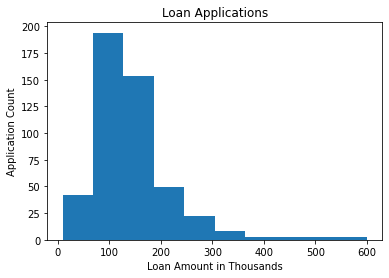

In [77]:
# Create a histogram of loan applications
plt.hist(df['LoanAmount'])
plt.title('Loan Applications')
plt.xlabel('Loan Amount in Thousands')
plt.ylabel('Application Count')

In [39]:
# View the distribution of loan approval
df['Loan_Status_Y'].value_counts()

1    332
0    148
Name: Loan_Status_Y, dtype: int64

In [55]:
# Build training and test datasets
x = df.drop(['Loan_Status_Y'], axis=1)
y = df['Loan_Status_Y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Building the model - Logistic Regression

In [56]:
# Load libraries
from sklearn.linear_model import LogisticRegression

In [57]:
# Setup an instance of the model
model = LogisticRegression(max_iter=10000)

In [58]:
# Fit the model
model.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

# Evaluating the model - Logistic Regression

In [59]:
# Load libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [60]:
# Build predictions
predictions = model.predict(x_test)

In [61]:
# Calculate accuracy score
accuracy_score(y_test, predictions)

0.8229166666666666

[Text(0, 0.5, 'Rejected'), Text(0, 1.5, 'Approved')]

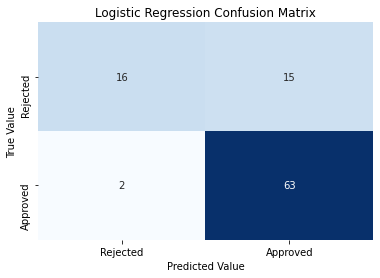

In [62]:
# Build a confusion matrix of the results
matrix = confusion_matrix(y_test, predictions)

# Create pandas df
cm_df = pd.DataFrame(matrix)

# Create heatmap
ax= plt.subplot()
sns.heatmap(cm_df, annot=True, cbar=None, cmap="Blues", ax=ax)
ax.set_title("Logistic Regression Confusion Matrix")
ax.set_ylabel("True Value"), ax.set_xlabel("Predicted Value")
ax.xaxis.set_ticklabels(['Rejected', 'Approved']); ax.yaxis.set_ticklabels(['Rejected', 'Approved'])

The model successfully approved 63 out of 65 loans. However, it incorrectly approved 15/31 loans that should have been rejected.

# Building the model - Random Forest

In [63]:
# Load libraries
from sklearn.ensemble import RandomForestClassifier

In [64]:
# Setup an instance of the model
rf = RandomForestClassifier(n_estimators=10000, random_state=711, n_jobs = -1)

In [65]:
# Train the model
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=711)

# Evaluating the model - Random Forest

In [69]:
# Build predictions
predictions_rf = rf.predict(x_test)

In [70]:
# Calculate accuracy score
accuracy_score(y_test, predictions_rf)

0.7395833333333334

[Text(0, 0.5, 'Rejected'), Text(0, 1.5, 'Approved')]

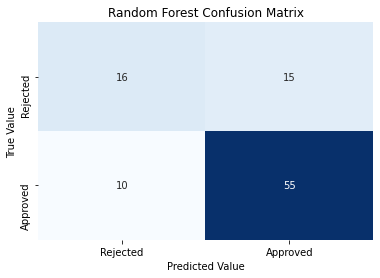

In [73]:
# Build a confusion matrix of the results
matrix_rf = confusion_matrix(y_test, predictions_rf)

# Create pandas df
cm_df_rf = pd.DataFrame(matrix_rf)

# Create heatmap
ax= plt.subplot()
sns.heatmap(cm_df_rf, annot=True, cbar=None, cmap="Blues", ax=ax)
ax.set_title("Random Forest Confusion Matrix")
ax.set_ylabel("True Value"), ax.set_xlabel("Predicted Value")
ax.xaxis.set_ticklabels(['Rejected', 'Approved']); ax.yaxis.set_ticklabels(['Rejected', 'Approved'])

The random forest model has the same level false positives as the logistic regression model. However, it has a greater number of false negatives.